<a href="https://colab.research.google.com/github/Kac1509/ZebrafishClassifier/blob/master/Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#import sys
#sys.path.insert(0, '/content/gdrive/My Drive/Colab Notebooks/Classifier/scripts')
#print(sys.path)

In [0]:
%load_ext autoreload
%autoreload 2
import os
import sys
sys.path.insert(0, '/content/gdrive/My Drive/Colab Notebooks/Classifier/scripts')
print(sys.path)
from load_pre_trained_VGG16 import *
from load_pre_trained_Inception import *
from build_model_RMSprop import *
from unzip_data import *
from create_data_generators import *
from model_prediction import *
from createFolders import *
from createSets import *
from saveFiles import *
from plot_loss_acc import *
from predictClass import *




['/content/gdrive/My Drive/Colab Notebooks/Classifier/scripts', '', '/env/python', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/root/.ipython']


In [0]:
Data_file = 'DataStraightened.zip'
Base_path = '/content/gdrive/My Drive/Colab Notebooks/Classifier/'
Zip_path = Base_path + Data_file
Extracted_path = Base_path + 'ExtractedData/'
Partitioned_path = Base_path + 'PartitionedData/'
Prediction_path = Base_path + 'Predictions/'


In [0]:
shapeY = 75
shapeX = 750
color_channels = 3

# Loading pre-trained models
local_weights_file_VGG16 = '/content/gdrive/My Drive/Colab Notebooks/weights/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model_VGG16, last_layer_output_VGG16 = load_pre_trained_VGG16(local_weights_file_VGG16, shapeY, shapeX, color_channels)


# Inception model
# local_weights_file_Inception = '/content/gdrive/My Drive/Colab Notebooks/weights/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
# pre_trained_model_Inception, last_layer_output_Inception = load_pre_trained_Inception(local_weights_file_Inception, shapeY, shapeX, color_channels)


In [0]:
deleteFiles(Extracted_path)
deleteFiles(Partitioned_path)
createFolder(Prediction_path)


In [0]:
unzip_data(Zip_path, Extracted_path)

In [0]:
Genotypes = []
num_classes = len(glob.glob(Extracted_path+'*'))
for i in range(num_classes):
        #Retrieve directory for a given type
        Genotype_name = os.listdir(Extracted_path)[i]
        Genotypes.append(Genotype(Genotype_name))
print(num_classes)
createDirectories(num_classes,Extracted_path,Partitioned_path,Genotypes)


3


<PIL.PngImagePlugin.PngImageFile image mode=RGB size=1359x150 at 0x7F74FAE13B00>


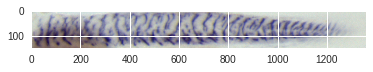

In [0]:
print(Genotypes[1].images[0])
#Genotypes[1].images
plt.imshow(Genotypes[1].images[0])

In [0]:
#Partition data into training and test set
#If fixed is true, all training and test sets have the same size for all classes 
createTrain_Test(Genotypes,0.5, fixed = True)

31
76
33


In [0]:
#Save partitions to respective folders
saveFiles(Genotypes)

In [0]:
# Creating training and validation data generators from separated data
# Transformations are for training generator only
train_generator, validation_generator = create_data_generators(
    Partitioned_path,
    shapeY, shapeX, 
    train_batch_size=8, 
    validation_batch_size=10,
    class_mode='categorical')#,
    #rotation_range=30,
    #width_shift_range=0.3,
    #height_shift_range=0.3,
    #shear_range=0.3,
    #zoom_range=0.3)

Found 48 images belonging to 3 classes.
Found 45 images belonging to 3 classes.


In [0]:
# Building model

model = build_model_RMSprop(pre_trained_model_VGG16, last_layer_output_VGG16, 
                            learning_rate = 0.00001, hidden_units_num = 1024,num_classes=num_classes,activation = 'softmax')

In [0]:
# Training model

history = model.fit_generator(
      train_generator,
      steps_per_epoch=4,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=3,
      verbose=2)

Epoch 1/50
 - 3s - loss: 0.5360 - acc: 0.7292 - val_loss: 0.4093 - val_acc: 0.8667
Epoch 2/50
 - 2s - loss: 0.3631 - acc: 0.9167 - val_loss: 0.3023 - val_acc: 0.9667
Epoch 3/50
 - 1s - loss: 0.2733 - acc: 0.9479 - val_loss: 0.2456 - val_acc: 0.9778
Epoch 4/50
 - 1s - loss: 0.2031 - acc: 1.0000 - val_loss: 0.2172 - val_acc: 1.0000
Epoch 5/50
 - 2s - loss: 0.1558 - acc: 1.0000 - val_loss: 0.1799 - val_acc: 1.0000
Epoch 6/50
 - 1s - loss: 0.1440 - acc: 1.0000 - val_loss: 0.1855 - val_acc: 0.9667
Epoch 7/50
 - 1s - loss: 0.1162 - acc: 1.0000 - val_loss: 0.1486 - val_acc: 0.9889
Epoch 8/50
 - 2s - loss: 0.1028 - acc: 1.0000 - val_loss: 0.1219 - val_acc: 1.0000
Epoch 9/50
 - 2s - loss: 0.0806 - acc: 1.0000 - val_loss: 0.1213 - val_acc: 0.9889
Epoch 10/50
 - 1s - loss: 0.0733 - acc: 1.0000 - val_loss: 0.1054 - val_acc: 1.0000
Epoch 11/50
 - 2s - loss: 0.0644 - acc: 1.0000 - val_loss: 0.1021 - val_acc: 0.9778
Epoch 12/50
 - 2s - loss: 0.0465 - acc: 1.0000 - val_loss: 0.0862 - val_acc: 1.0000
E

In [0]:
#Predict Model based on validation set
model_prediction(
    model, 
    Genotypes,
    shapeY, shapeX, 
    class_mode = 'categorical' # If the content of class0_test_path and class1_test_path should be refreshed
    )

Found 15 images belonging to 1 classes.
15/15 [==============================] - 1s 44ms/step
fsstbx6s
[[6.7757155e-06 9.9968231e-01 3.1087856e-04]
 [5.1471384e-06 9.9937457e-01 6.2036508e-04]
 [1.5795425e-05 9.9836463e-01 1.6195501e-03]
 [1.2304886e-05 9.9859828e-01 1.3895064e-03]
 [3.2990501e-05 9.9662328e-01 3.3436399e-03]
 [1.8406181e-05 9.9977630e-01 2.0536469e-04]
 [3.7590994e-06 9.9873239e-01 1.2637766e-03]
 [5.5035372e-05 9.9347997e-01 6.4649405e-03]
 [6.3465304e-06 9.9627858e-01 3.7151566e-03]
 [7.3396172e-05 8.1773853e-01 1.8218805e-01]
 [1.8427229e-06 9.9979812e-01 2.0011497e-04]
 [1.8605062e-05 8.3317333e-01 1.6680808e-01]
 [2.8977430e-04 9.7082144e-01 2.8888788e-02]
 [4.2432084e-06 9.9845314e-01 1.5425656e-03]
 [4.7101285e-06 9.9892235e-01 1.0728717e-03]]
Found 15 images belonging to 1 classes.
15/15 [==============================] - 0s 31ms/step
her1her7s
[[1.19160475e-04 2.78810330e-04 9.99602020e-01]
 [1.54659792e-03 3.77275137e-04 9.98076081e-01]
 [8.59677140e-03 2.92

In [0]:
#Predict Model based on Images placed in Prediction Folder
predictions = predictClass(model,Prediction_path, shapeY, shapeX, class_mode='categorical')
print(predictions)

Found 31 images belonging to 1 classes.
31/31 [==============================] - 9s 276ms/step
['Png/1L-s.png', 'Png/20161213_1-1-s.png', 'Png/20161213_2-1-s.png', 'Png/20161213_3-1-s.png', 'Png/20161213_4-1-s.png', 'Png/20161213_5-1-s.png', 'Png/20170104_10s.png', 'Png/20170104_11s.png', 'Png/20170104_12s.png', 'Png/20170104_13s.png', 'Png/20170104_14s.png', 'Png/20170104_15s.png', 'Png/20170104_1s.png', 'Png/20170104_2s.png', 'Png/20170104_3s.png', 'Png/20170104_4s.png', 'Png/20170104_5s.png', 'Png/20170104_6s.png', 'Png/20170104_7s.png', 'Png/20170104_8s.png', 'Png/20170104_9s.png', 'Png/20170801_18-flipped-1-s.png', 'Png/20170801_9-1-s.png', 'Png/2L-s.png', 'Png/3L-s.png', 'Png/4L-s.png', 'Png/5L-s.png', 'Png/6L-s.png', 'Png/7L-s.png', 'Png/8L-s.png', 'Png/9L-s.png']
[[1.2304886e-05 9.9859828e-01 1.3895064e-03]
 [1.3694210e-05 9.9995935e-01 2.6955408e-05]
 [7.1159366e-07 9.9958724e-01 4.1205139e-04]
 [4.9404098e-06 9.9980277e-01 1.9233546e-04]
 [7.3396172e-05 8.1773853e-01 1.821880

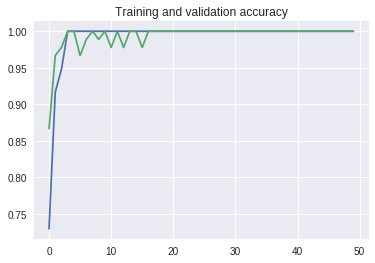

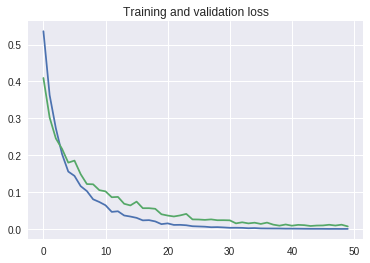

In [0]:
#Plot training and validation accuracy per epoch
plot_loss_acc(history)